In [2]:
import pandas as ps 
import numpy as ny 
import matplotlib.pyplot as ml
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
DF=ps.read_csv(r"C:\Users\ShinChan\Downloads\HouseData.csv")

In [4]:
DF.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
DF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
DF.columns.nunique()

81

In [7]:
DF.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

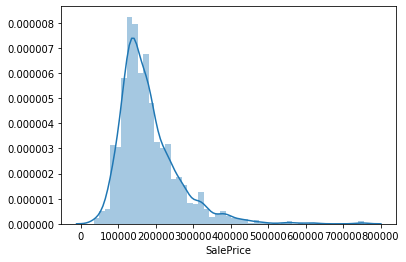

In [8]:
sb.distplot(DF.SalePrice)

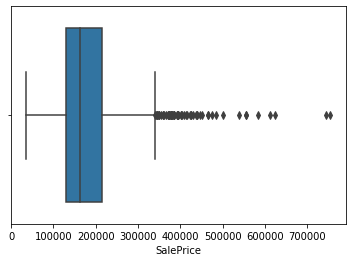

In [9]:
sb.boxplot(DF.SalePrice)

In [10]:
DF.Id.describe()

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

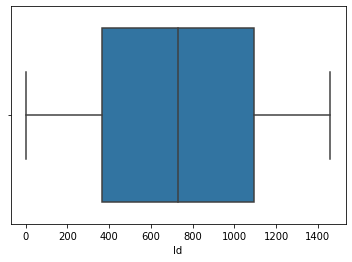

In [11]:
sb.boxplot(DF.Id)

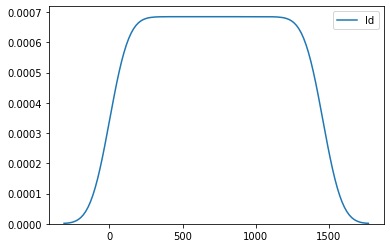

In [12]:
sb.kdeplot(DF.Id)

In [13]:
DF.select_dtypes(exclude="int64")

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,1999.0,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,85.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,1978.0,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,66.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,1941.0,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,68.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1950.0,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
DF.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [15]:
DF.SalePrice.skew()

1.8828757597682129

<BarContainer object of 1460 artists>

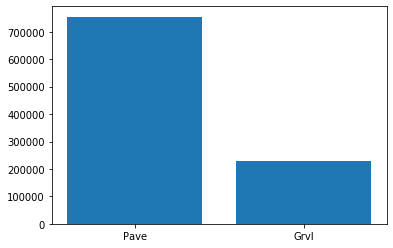

In [16]:
ml.bar(DF.Street,DF.SalePrice)

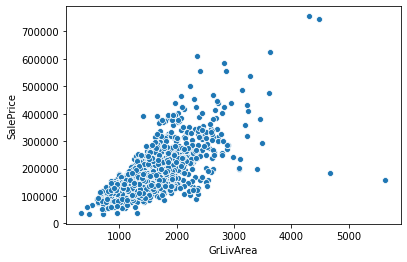

In [17]:
sb.scatterplot(DF.GrLivArea,DF.SalePrice)

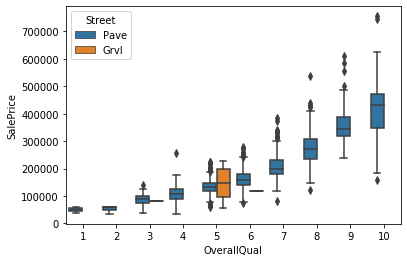

In [18]:
sb.boxplot(DF.OverallQual,DF.SalePrice,hue=DF.Street)

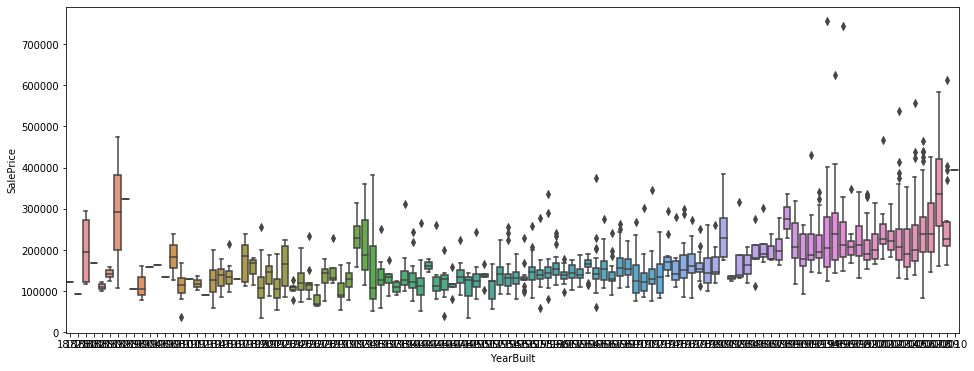

In [19]:
ml.figure(figsize=(16,6))
sb.boxplot(DF.YearBuilt,DF.SalePrice)

In [20]:
 DF.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


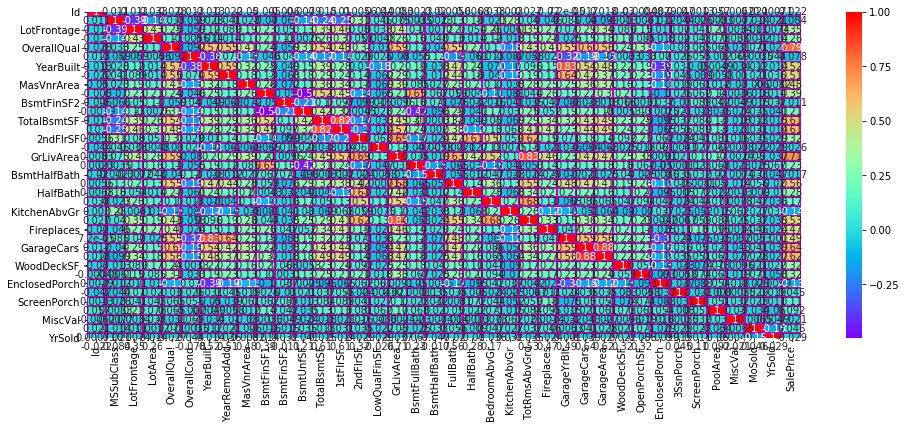

In [21]:
ml.figure(figsize=(16,6))
sb.heatmap(DF.corr(),annot=True,cmap="rainbow",linecolor="m",linewidths=.9)

In [22]:
miss = DF.isnull().sum().sort_values(ascending=False)
mis = (DF.isnull().sum()/DF.isnull().count().sort_values(ascending=False))*100

In [23]:
SS=ps.concat([miss,mis],axis=1,keys=["Total","percentage"])
SS.sort_values(by="Total")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Total,percentage
1stFlrSF,0,0.000000
MiscVal,0,0.000000
MSZoning,0,0.000000
MSSubClass,0,0.000000
LowQualFinSF,0,0.000000
...,...,...
FireplaceQu,690,47.260274
Fence,1179,80.753425
Alley,1369,93.767123
MiscFeature,1406,96.301370


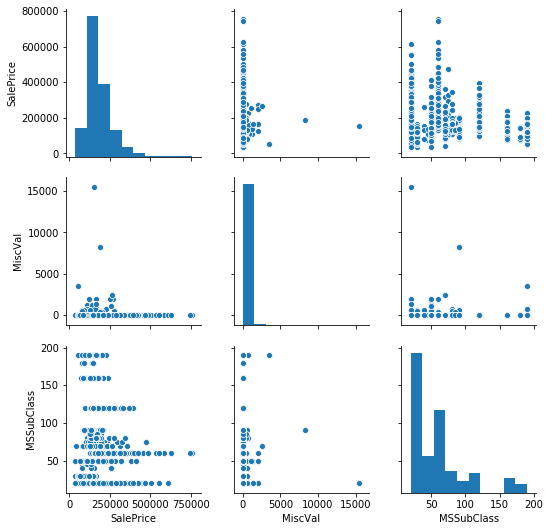

In [35]:
sb.pairplot(DF[["SalePrice","Street","MiscVal","MSSubClass"]])

# Regression 2

In [ ]:
import numpy as ny 
import pandas as ps
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import